In [2]:
# Import Libraries and dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Read the data and display the first five rows
df = pd.read_csv('/Users/rodneydavermann/Desktop/DAT202.3x/DelayedFlights.csv', sep=',', index_col=False)
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Data Wrangling

In [6]:
# Drop the Unnamed column and rename the dataframe 
flight_df = df.iloc[:,1:30] 
flight_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Convert any string in lower case
flight_df.columns = flight_df.columns.str.lower()
 
string_columns = list(flight_df.dtypes[flight_df.dtypes == 'object'].index) # B
 
for col in string_columns:
    flight_df[col] = flight_df[col].str.lower()
flight_df = flight_df.rename(columns=lambda x: x.strip())
flight_df

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,wn,335,...,4.0,8.0,0,n,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,wn,3231,...,5.0,10.0,0,n,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,wn,448,...,3.0,17.0,0,n,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,wn,3920,...,3.0,10.0,0,n,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,wn,378,...,4.0,10.0,0,n,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,dl,1621,...,9.0,18.0,0,n,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,dl,1631,...,15.0,34.0,0,n,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,dl,1631,...,8.0,32.0,0,n,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,dl,1639,...,13.0,13.0,0,n,0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Data set Size
print("Instance and Feature: \n", flight_df.shape)

Instance and Feature: 
 (1936758, 29)


In [9]:
# Overview of the dataset
flight_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   year               int64  
 1   month              int64  
 2   dayofmonth         int64  
 3   dayofweek          int64  
 4   deptime            float64
 5   crsdeptime         int64  
 6   arrtime            float64
 7   crsarrtime         int64  
 8   uniquecarrier      object 
 9   flightnum          int64  
 10  tailnum            object 
 11  actualelapsedtime  float64
 12  crselapsedtime     float64
 13  airtime            float64
 14  arrdelay           float64
 15  depdelay           float64
 16  origin             object 
 17  dest               object 
 18  distance           int64  
 19  taxiin             float64
 20  taxiout            float64
 21  cancelled          int64  
 22  cancellationcode   object 
 23  diverted           int64  
 24  carrierdelay       float64
 25  weatherdelay      

In [10]:
# Delete some columns
flight_df.drop(['year','dayofmonth','crsarrtime','cancelled','cancellationcode','diverted','carrierdelay','weatherdelay','nasdelay','securitydelay','lateaircraftdelay','tailnum','actualelapsedtime','crselapsedtime','taxiin','taxiout'],axis=1, inplace=True)
flight_df

,month,dayofweek,deptime,crsdeptime,arrtime,uniquecarrier,flightnum,airtime,arrdelay,depdelay,origin,dest,distance
0,1,4,2003.0,1955,2211.0,wn,335,116.0,-14.0,8.0,iad,tpa,810
1,1,4,754.0,735,1002.0,wn,3231,113.0,2.0,19.0,iad,tpa,810
2,1,4,628.0,620,804.0,wn,448,76.0,14.0,8.0,ind,bwi,515
3,1,4,1829.0,1755,1959.0,wn,3920,77.0,34.0,34.0,ind,bwi,515
4,1,4,1940.0,1915,2121.0,wn,378,87.0,11.0,25.0,ind,jax,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,6,1250.0,1220,1617.0,dl,1621,120.0,25.0,30.0,msp,atl,906
1936754,12,6,657.0,600,904.0,dl,1631,78.0,75.0,57.0,ric,atl,481
1936755,12,6,1007.0,847,1149.0,dl,1631,122.0,99.0,80.0,atl,iah,689
1936756,12,6,1251.0,1240,1446.0,dl,1639,89.0,9.0,11.0,iad,atl,533


In [11]:
# Transform categorical features values to upper character 
flight_df['dest']= flight_df['dest'].str.upper()   
flight_df['uniquecarrier']= flight_df['uniquecarrier'].str.upper()
flight_df['origin']= flight_df['origin'].str.upper()                         
flight_df

,month,dayofweek,deptime,crsdeptime,arrtime,uniquecarrier,flightnum,airtime,arrdelay,depdelay,origin,dest,distance
0,1,4,2003.0,1955,2211.0,WN,335,116.0,-14.0,8.0,IAD,TPA,810
1,1,4,754.0,735,1002.0,WN,3231,113.0,2.0,19.0,IAD,TPA,810
2,1,4,628.0,620,804.0,WN,448,76.0,14.0,8.0,IND,BWI,515
3,1,4,1829.0,1755,1959.0,WN,3920,77.0,34.0,34.0,IND,BWI,515
4,1,4,1940.0,1915,2121.0,WN,378,87.0,11.0,25.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,6,1250.0,1220,1617.0,DL,1621,120.0,25.0,30.0,MSP,ATL,906
1936754,12,6,657.0,600,904.0,DL,1631,78.0,75.0,57.0,RIC,ATL,481
1936755,12,6,1007.0,847,1149.0,DL,1631,122.0,99.0,80.0,ATL,IAH,689
1936756,12,6,1251.0,1240,1446.0,DL,1639,89.0,9.0,11.0,IAD,ATL,533


In [12]:
# Null values by feature
flight_df.isna().sum()

month               0
dayofweek           0
deptime             0
crsdeptime          0
arrtime          7110
uniquecarrier       0
flightnum           0
airtime          8387
arrdelay         8387
depdelay            0
origin              0
dest                0
distance            0
dtype: int64

In [13]:
# Getting column names
flight_df.columns

Index(['month', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'uniquecarrier', 'flightnum', 'airtime', 'arrdelay', 'depdelay',
       'origin', 'dest', 'distance'],
      dtype='object')

In [14]:
# Create a new categorical delay variable based on arrdelay values

# create categorise function with row as argument
def categorise(row):  
    if row['arrdelay'] > 0:
        return 1 # 1=delay
    else:
        return 0 # 0=nodelay

In [15]:
# Passe the categorise function to the apply method
flight_df['delay'] = flight_df.apply(lambda row: categorise(row), axis=1)

In [16]:
# Display the dataset 
flight_df

,month,dayofweek,deptime,crsdeptime,arrtime,uniquecarrier,flightnum,airtime,arrdelay,depdelay,origin,dest,distance,delay
0,1,4,2003.0,1955,2211.0,WN,335,116.0,-14.0,8.0,IAD,TPA,810,0
1,1,4,754.0,735,1002.0,WN,3231,113.0,2.0,19.0,IAD,TPA,810,1
2,1,4,628.0,620,804.0,WN,448,76.0,14.0,8.0,IND,BWI,515,1
3,1,4,1829.0,1755,1959.0,WN,3920,77.0,34.0,34.0,IND,BWI,515,1
4,1,4,1940.0,1915,2121.0,WN,378,87.0,11.0,25.0,IND,JAX,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,6,1250.0,1220,1617.0,DL,1621,120.0,25.0,30.0,MSP,ATL,906,1
1936754,12,6,657.0,600,904.0,DL,1631,78.0,75.0,57.0,RIC,ATL,481,1
1936755,12,6,1007.0,847,1149.0,DL,1631,122.0,99.0,80.0,ATL,IAH,689,1
1936756,12,6,1251.0,1240,1446.0,DL,1639,89.0,9.0,11.0,IAD,ATL,533,1


In [17]:
# Drop arrdelay
flight_df.drop(['arrdelay'],axis=1, inplace=True)
flight_df

,month,dayofweek,deptime,crsdeptime,arrtime,uniquecarrier,flightnum,airtime,depdelay,origin,dest,distance,delay
0,1,4,2003.0,1955,2211.0,WN,335,116.0,8.0,IAD,TPA,810,0
1,1,4,754.0,735,1002.0,WN,3231,113.0,19.0,IAD,TPA,810,1
2,1,4,628.0,620,804.0,WN,448,76.0,8.0,IND,BWI,515,1
3,1,4,1829.0,1755,1959.0,WN,3920,77.0,34.0,IND,BWI,515,1
4,1,4,1940.0,1915,2121.0,WN,378,87.0,25.0,IND,JAX,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,6,1250.0,1220,1617.0,DL,1621,120.0,30.0,MSP,ATL,906,1
1936754,12,6,657.0,600,904.0,DL,1631,78.0,57.0,RIC,ATL,481,1
1936755,12,6,1007.0,847,1149.0,DL,1631,122.0,80.0,ATL,IAH,689,1
1936756,12,6,1251.0,1240,1446.0,DL,1639,89.0,11.0,IAD,ATL,533,1


In [18]:
# Count of delay/no_delay
flight_df['delay'].value_counts()

1    1723415
0     213343
Name: delay, dtype: int64

# Handling missing data 

### For EDA purpose, the missing data will be replace by the mean of each column. 

In [19]:
# Features data types 
flight_df.dtypes.value_counts()

int64      6
float64    4
object     3
dtype: int64

In [20]:
#flight_df.isna().sum()
# Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
cat_flight_df = flight_df.select_dtypes(exclude=numerics)
num_flight_df = flight_df.select_dtypes(include=numerics)
# Display the first five rows of num_flight_df
num_flight_df.head()

,month,dayofweek,deptime,crsdeptime,arrtime,flightnum,airtime,depdelay,distance,delay
0,1,4,2003.0,1955,2211.0,335,116.0,8.0,810,0
1,1,4,754.0,735,1002.0,3231,113.0,19.0,810,1
2,1,4,628.0,620,804.0,448,76.0,8.0,515,1
3,1,4,1829.0,1755,1959.0,3920,77.0,34.0,515,1
4,1,4,1940.0,1915,2121.0,378,87.0,25.0,688,1


In [21]:
# Replace the missing data by the mean (Doing it for each feature)
# Compute means features
num_flight_df.mean()
#Create a new dataframe with only the numerical features where we replace any missing data by the column mean it is belong. 
num_flight_df2=num_flight_df.fillna(num_flight_df.mean())
# Print the first five rows of the new dataframe
num_flight_df2.head()

,month,dayofweek,deptime,crsdeptime,arrtime,flightnum,airtime,depdelay,distance,delay
0,1,4,2003.0,1955,2211.0,335,116.0,8.0,810,0
1,1,4,754.0,735,1002.0,3231,113.0,19.0,810,1
2,1,4,628.0,620,804.0,448,76.0,8.0,515,1
3,1,4,1829.0,1755,1959.0,3920,77.0,34.0,515,1
4,1,4,1940.0,1915,2121.0,378,87.0,25.0,688,1


In [22]:
# Count missing by feature
num_flight_df2.isna().sum()

month         0
dayofweek     0
deptime       0
crsdeptime    0
arrtime       0
flightnum     0
airtime       0
depdelay      0
distance      0
delay         0
dtype: int64

### Now the numerical dataset has no missing values

In [23]:
# Display the first five rows of cat_flight_df 
cat_flight_df.head()

,uniquecarrier,origin,dest
0,WN,IAD,TPA
1,WN,IAD,TPA
2,WN,IND,BWI
3,WN,IND,BWI
4,WN,IND,JAX


In [24]:
# Count missing Data in the categorical data frame
cat_flight_df.isna().sum()

uniquecarrier    0
origin           0
dest             0
dtype: int64

In [25]:
# Merge cat_flight_df and num_flight_df2 into a single dataframe
airline_df =pd.concat([cat_flight_df,num_flight_df2], axis=1)
airline_df

,uniquecarrier,origin,dest,month,dayofweek,deptime,crsdeptime,arrtime,flightnum,airtime,depdelay,distance,delay
0,WN,IAD,TPA,1,4,2003.0,1955,2211.0,335,116.0,8.0,810,0
1,WN,IAD,TPA,1,4,754.0,735,1002.0,3231,113.0,19.0,810,1
2,WN,IND,BWI,1,4,628.0,620,804.0,448,76.0,8.0,515,1
3,WN,IND,BWI,1,4,1829.0,1755,1959.0,3920,77.0,34.0,515,1
4,WN,IND,JAX,1,4,1940.0,1915,2121.0,378,87.0,25.0,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,DL,MSP,ATL,12,6,1250.0,1220,1617.0,1621,120.0,30.0,906,1
1936754,DL,RIC,ATL,12,6,657.0,600,904.0,1631,78.0,57.0,481,1
1936755,DL,ATL,IAH,12,6,1007.0,847,1149.0,1631,122.0,80.0,689,1
1936756,DL,IAD,ATL,12,6,1251.0,1240,1446.0,1639,89.0,11.0,533,1


In [26]:
# Count missing Data for airline_df
airline_df.isna().sum()

uniquecarrier    0
origin           0
dest             0
month            0
dayofweek        0
deptime          0
crsdeptime       0
arrtime          0
flightnum        0
airtime          0
depdelay         0
distance         0
delay            0
dtype: int64

In [27]:
# New size
print("Instance and Feature: \n", airline_df.shape)

Instance and Feature: 
 (1936758, 13)


In [28]:
# Count of delay/no_delay which values for the target variable
airline_df['delay'].value_counts()

1    1723415
0     213343
Name: delay, dtype: int64

### Based on the cell below, we need to resample the airline_df before using it to train, test, or even validate a model in Machine Learning.  

In [29]:
# Rename some categorical features

airline_df1=airline_df .rename(columns={'crsdeptime': 'scheduled_departure_time','crsarrtime': 'scheduled_arrival_time ','arrdelay': 'arrival_delay',
             'depdelay': 'departure_delay' })
airline_df1.columns

Index(['uniquecarrier', 'origin', 'dest', 'month', 'dayofweek', 'deptime',
       'scheduled_departure_time', 'arrtime', 'flightnum', 'airtime',
       'departure_delay', 'distance', 'delay'],
      dtype='object')

In [30]:
# Save a copy of airline_df1 on local machine 
airline_df1.to_csv('airline_FinalProject.csv', index=False, encoding='utf-8')

In [31]:
# How many unique values per feature
airline_df1.nunique().to_frame()

,0
uniquecarrier,20
origin,303
dest,304
month,12
dayofweek,7
deptime,1438
scheduled_departure_time,1207
arrtime,1441
flightnum,7499
airtime,651


In [32]:
# Check number of duplicates
n_duplicates = airline_df1.duplicated().sum()

print(f"There are {n_duplicates} duplicates in the dataset.")

There are 91 duplicates in the dataset.


In [33]:
# Drop duplicates 
airline_df2 = airline_df1.drop_duplicates()
airline_df2.shape

(1936667, 13)

In [34]:
# Count how many times each data type is present in the dataset
pd.value_counts(airline_df2.dtypes)

int64      6
float64    4
object     3
dtype: int64

In [35]:
# Dataframe size after dropping

print("Total rows in the original data set:", len(airline_df1))
print("Total rows in the data set after dropped:", len(airline_df2))

Total rows in the original data set: 1936758
Total rows in the data set after dropped: 1936667


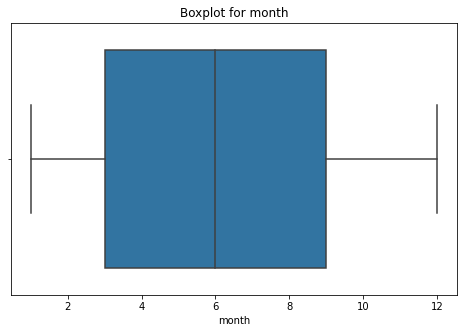

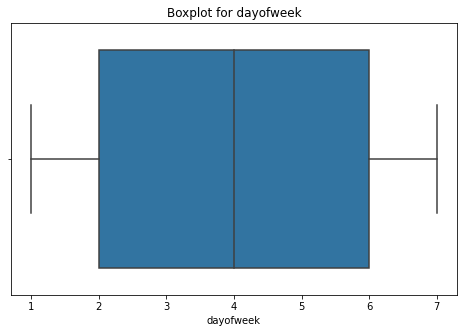

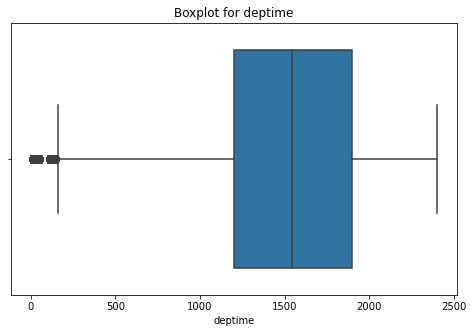

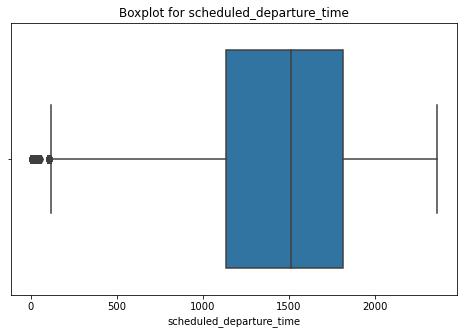

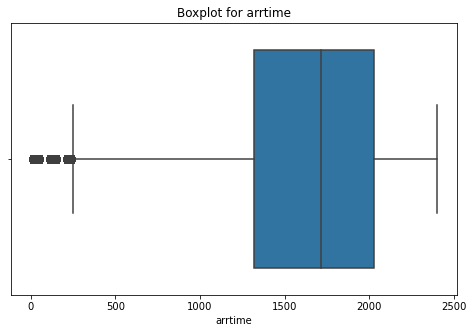

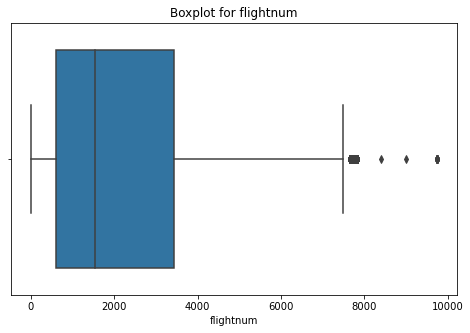

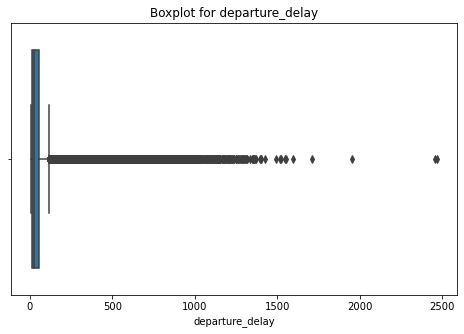

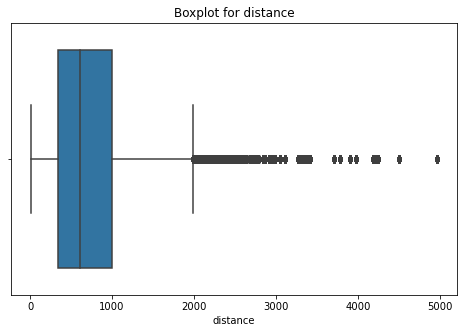

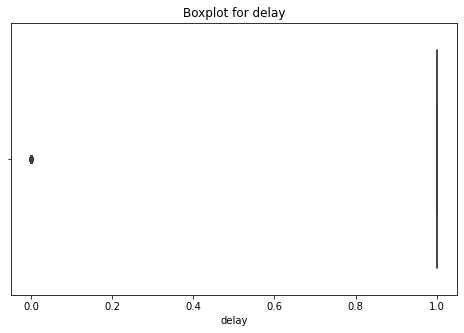

In [74]:
# Check for Outliers

# Define a new variable using the numerical data type
numerics = ['int16','int32','int64','float64']

# Select all features which numerical data type
cols_new = airline_df2.select_dtypes(include=numerics)

# Draw a boxplot for each feature with numerical data type
for column in cols_new:
   plt.figure(figsize=(8,5))
   sns.boxplot(x=airline_df2[column])
   plt.title(f'Boxplot for {column}')
   plt.show()

In [75]:
# Handling outliers for airtime
max_val= airline_df2['deptime'].mean()+ (3 * airline_df2['deptime'].std())
max_val

2869.992224194885

(array([ 17716.,    805.,  52382., 188099., 220018., 335538., 330646.,
        361286., 338343.,  91834.]),
 array([1.0000e+00, 2.4090e+02, 4.8080e+02, 7.2070e+02, 9.6060e+02,
        1.2005e+03, 1.4404e+03, 1.6803e+03, 1.9202e+03, 2.1601e+03,
        2.4000e+03]),
 <BarContainer object of 10 artists>)

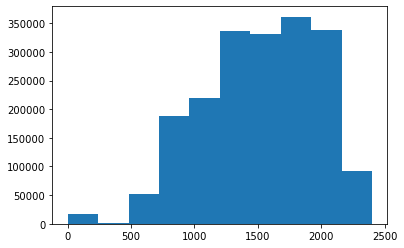

In [77]:
# Aitrime Histogram 
plt.hist(airline_df2['deptime'])

In [76]:
min_val= airline_df2['deptime'].mean()- (3 * airline_df2['deptime'].std())
min_val

167.0748110775703

In [63]:
airline_df2['airtime'] = airline_df2['airtime']<= max_val

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_12352/2901836151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_df2['airtime'] = airline_df2['airtime']<= max_val


In [64]:
airline_df2

,uniquecarrier,origin,dest,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
0,WN,IAD,TPA,1,4,2003.0,1955,2211.0,335,True,8.0,810,0
1,WN,IAD,TPA,1,4,754.0,735,1002.0,3231,True,19.0,810,1
2,WN,IND,BWI,1,4,628.0,620,804.0,448,True,8.0,515,1
3,WN,IND,BWI,1,4,1829.0,1755,1959.0,3920,True,34.0,515,1
4,WN,IND,JAX,1,4,1940.0,1915,2121.0,378,True,25.0,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,DL,MSP,ATL,12,6,1250.0,1220,1617.0,1621,True,30.0,906,1
1936754,DL,RIC,ATL,12,6,657.0,600,904.0,1631,True,57.0,481,1
1936755,DL,ATL,IAH,12,6,1007.0,847,1149.0,1631,True,80.0,689,1
1936756,DL,IAD,ATL,12,6,1251.0,1240,1446.0,1639,True,11.0,533,1


In [65]:
airline_df2.isnull().sum()

uniquecarrier               0
origin                      0
dest                        0
month                       0
dayofweek                   0
deptime                     0
scheduled_departure_time    0
arrtime                     0
flightnum                   0
airtime                     0
departure_delay             0
distance                    0
delay                       0
dtype: int64

(array([1.19395e+06, 5.83458e+05, 1.39048e+05, 1.80860e+04, 1.64000e+03,
        4.81000e+02, 3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  109.1,  218.2,  327.3,  436.4,  545.5,  654.6,  763.7,
         872.8,  981.9, 1091. ]),
 <BarContainer object of 10 artists>)

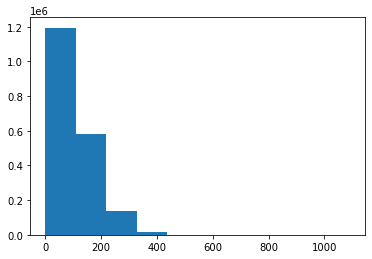

In [66]:
plt.hist(airtime)

TypeError: from_bounds() argument after * must be an iterable, not float

# Exploratory Data Analysis

In [35]:
# Display the airline_df2 
airline_df2

,uniquecarrier,origin,dest,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
0,WN,IAD,TPA,1,4,2003.0,1955,2211.0,335,116.0,8.0,810,0
1,WN,IAD,TPA,1,4,754.0,735,1002.0,3231,113.0,19.0,810,1
2,WN,IND,BWI,1,4,628.0,620,804.0,448,76.0,8.0,515,1
3,WN,IND,BWI,1,4,1829.0,1755,1959.0,3920,77.0,34.0,515,1
4,WN,IND,JAX,1,4,1940.0,1915,2121.0,378,87.0,25.0,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,DL,MSP,ATL,12,6,1250.0,1220,1617.0,1621,120.0,30.0,906,1
1936754,DL,RIC,ATL,12,6,657.0,600,904.0,1631,78.0,57.0,481,1
1936755,DL,ATL,IAH,12,6,1007.0,847,1149.0,1631,122.0,80.0,689,1
1936756,DL,IAD,ATL,12,6,1251.0,1240,1446.0,1639,89.0,11.0,533,1


In [36]:
# Import library
import calendar

In [37]:
# Convert month number to month name
airline_df2['month']= airline_df2['month'].apply(lambda x: calendar.month_abbr[x])

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_49939/2071601485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_df2['month']= airline_df2['month'].apply(lambda x: calendar.month_abbr[x])


In [38]:
airline_df2

,uniquecarrier,origin,dest,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
0,WN,IAD,TPA,Jan,4,2003.0,1955,2211.0,335,116.0,8.0,810,0
1,WN,IAD,TPA,Jan,4,754.0,735,1002.0,3231,113.0,19.0,810,1
2,WN,IND,BWI,Jan,4,628.0,620,804.0,448,76.0,8.0,515,1
3,WN,IND,BWI,Jan,4,1829.0,1755,1959.0,3920,77.0,34.0,515,1
4,WN,IND,JAX,Jan,4,1940.0,1915,2121.0,378,87.0,25.0,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,DL,MSP,ATL,Dec,6,1250.0,1220,1617.0,1621,120.0,30.0,906,1
1936754,DL,RIC,ATL,Dec,6,657.0,600,904.0,1631,78.0,57.0,481,1
1936755,DL,ATL,IAH,Dec,6,1007.0,847,1149.0,1631,122.0,80.0,689,1
1936756,DL,IAD,ATL,Dec,6,1251.0,1240,1446.0,1639,89.0,11.0,533,1


In [39]:
#change numeric day of week to full name
day_dict = {1:'Monday', 2:'Tuesday', 3:'wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
day_list = airline_df2['dayofweek'].to_list()
day_name = [day_dict[day_num] for day_num in day_list]
airline_df2['dayofweek'] = day_name
airline_df2

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_49939/3325591023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_df2['dayofweek'] = day_name


,uniquecarrier,origin,dest,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
0,WN,IAD,TPA,Jan,Thursday,2003.0,1955,2211.0,335,116.0,8.0,810,0
1,WN,IAD,TPA,Jan,Thursday,754.0,735,1002.0,3231,113.0,19.0,810,1
2,WN,IND,BWI,Jan,Thursday,628.0,620,804.0,448,76.0,8.0,515,1
3,WN,IND,BWI,Jan,Thursday,1829.0,1755,1959.0,3920,77.0,34.0,515,1
4,WN,IND,JAX,Jan,Thursday,1940.0,1915,2121.0,378,87.0,25.0,688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,DL,MSP,ATL,Dec,Saturday,1250.0,1220,1617.0,1621,120.0,30.0,906,1
1936754,DL,RIC,ATL,Dec,Saturday,657.0,600,904.0,1631,78.0,57.0,481,1
1936755,DL,ATL,IAH,Dec,Saturday,1007.0,847,1149.0,1631,122.0,80.0,689,1
1936756,DL,IAD,ATL,Dec,Saturday,1251.0,1240,1446.0,1639,89.0,11.0,533,1


In [40]:
# Count for each weekdays
airline_df2['dayofweek'].value_counts()

Friday       323236
Monday       290925
Thursday     289438
Sunday       286098
wednesday    262791
Tuesday      260931
Saturday     223248
Name: dayofweek, dtype: int64

## Number of flight by day (Delay or Not Delay)

In [41]:
import plotly.express as px
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='count', ylabel='dayofweek'>

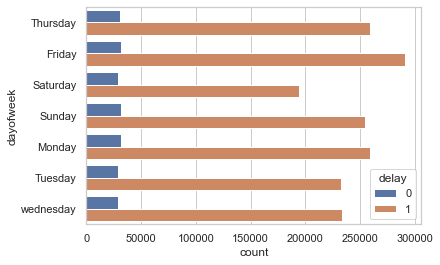

In [42]:
# 
sns.countplot(data=airline_df2, y="dayofweek",hue='delay')

### Number of flight by month (Delay or Not Delay)

<AxesSubplot:xlabel='month', ylabel='count'>

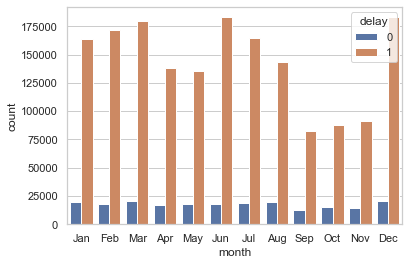

In [43]:
sns.countplot(data=airline_df2, x="month",hue='delay')

## How delay is related to other features

<AxesSubplot:>

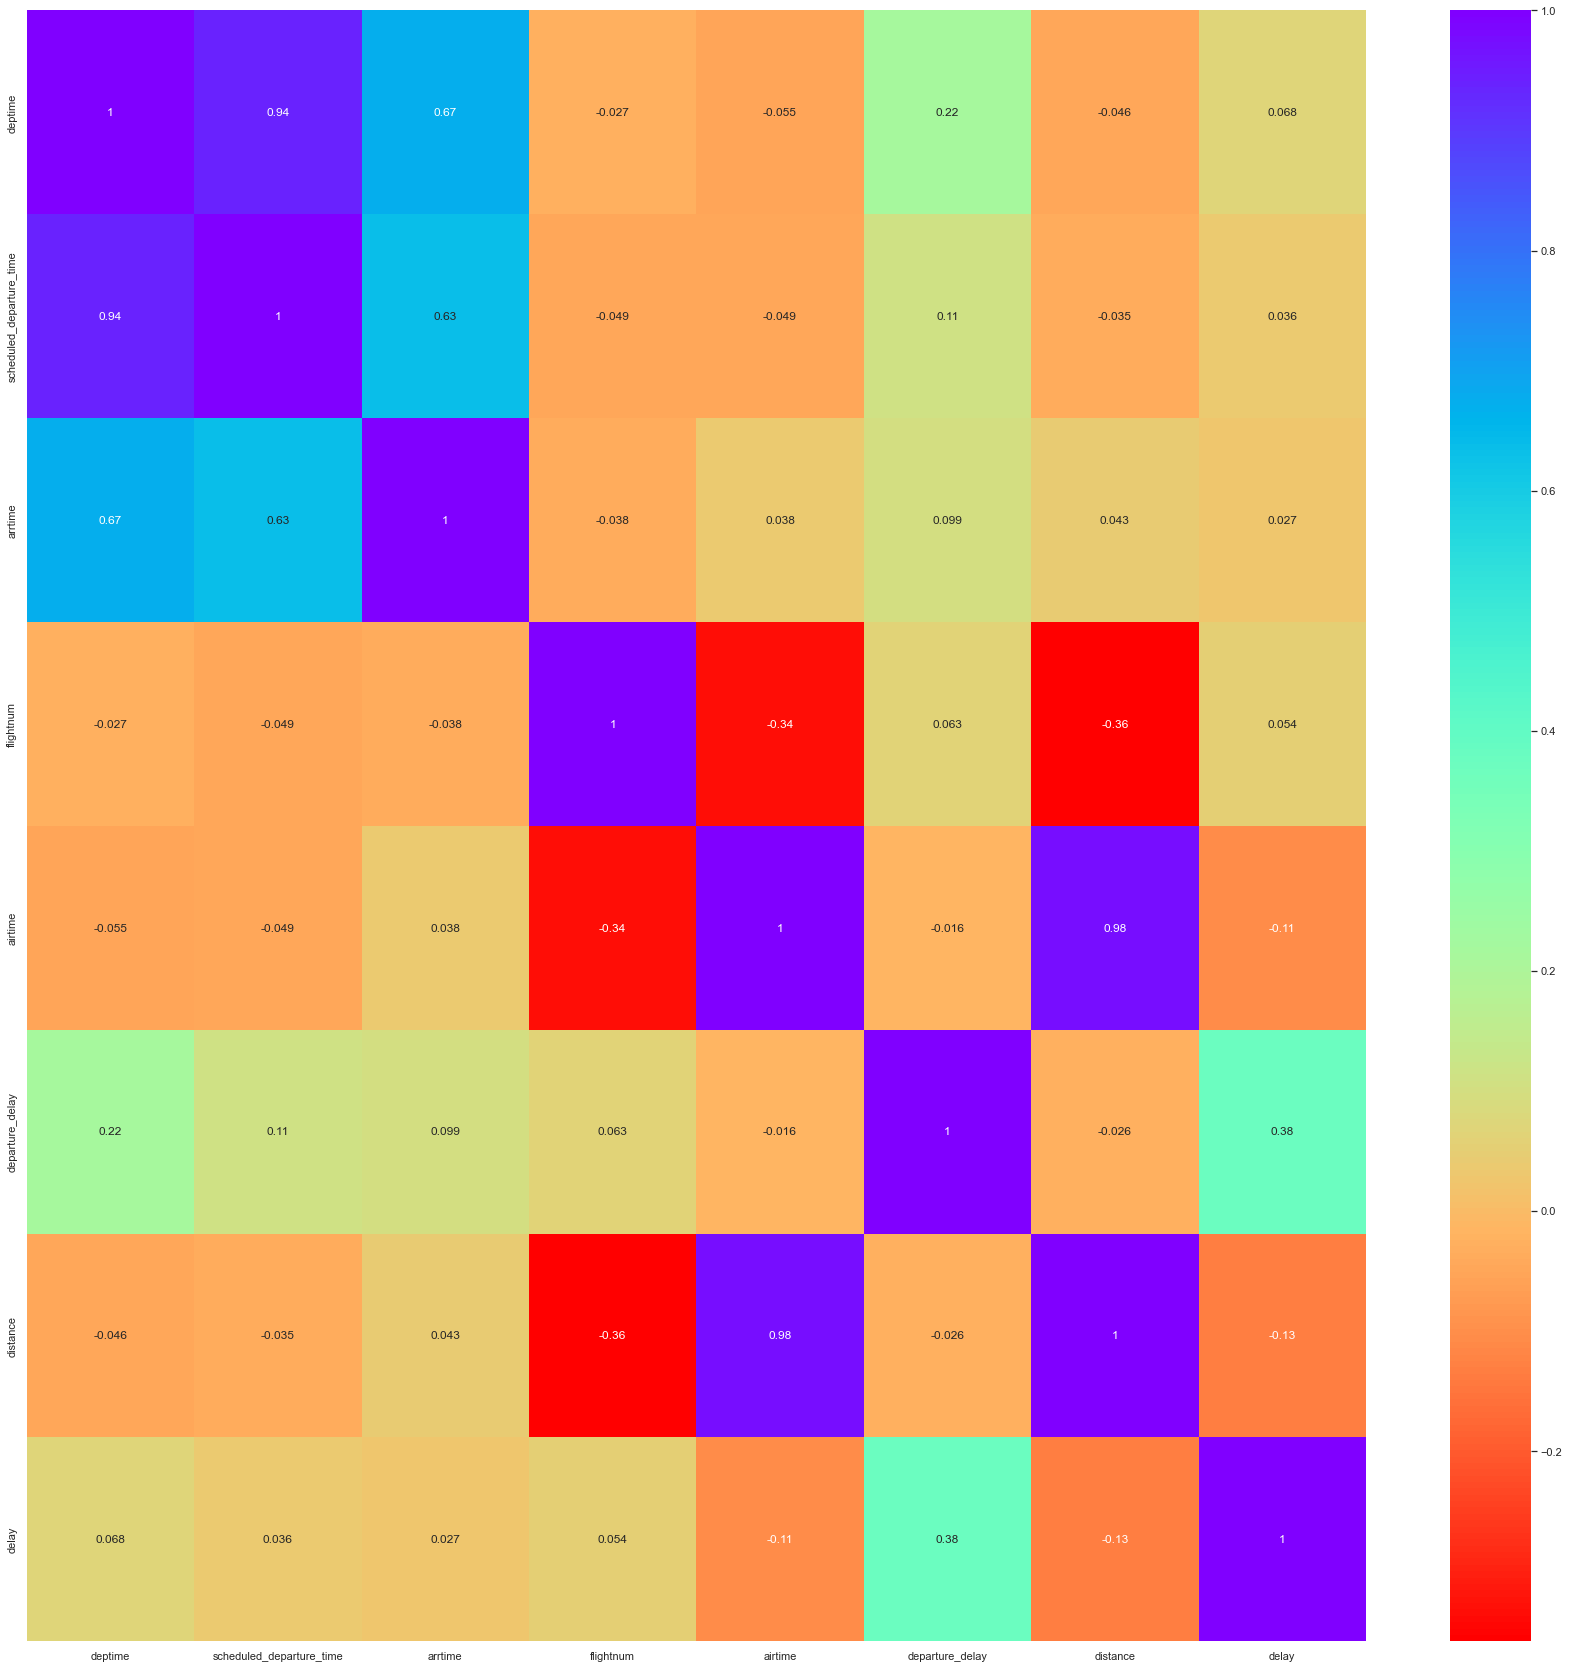

In [44]:
# Heatmap 
plt.figure(figsize=(30, 30))
sns.heatmap(airline_df2.corr(method='spearman'), cmap='rainbow_r', annot=True)

### Departure Airport, Company, with a more significant number of delayed flight

In [45]:
# Subset the dataset and group it by origin and delay 
origin_group=airline_df2[['origin','delay','month']].groupby(['origin','delay'])

In [46]:
# Count the number delay flight by airport and sort the grouping by ascending order
origin_group.count().sort_values(by=['month'],ascending=False)

,,month
origin,delay,
ATL,1,120336
ORD,1,114626
DFW,1,86935
DEN,1,65917
LAX,1,50524
...,...,...
PIR,0,1
INL,1,1
GST,0,1


In [47]:
# Subset the dataset and group it by company and delay 
origin_group=airline_df2[['uniquecarrier','delay','month']].groupby(['uniquecarrier','delay'])

In [48]:
# Count the number delay flight by company and sort the grouping by ascending order
origin_group.count().sort_values(by=['month'],ascending=False)

,,month
uniquecarrier,delay,
WN,1,324692
AA,1,172193
MQ,1,130645
UA,1,123989
OO,1,121939
DL,1,100923
XE,1,94309
CO,1,83645
US,1,83258


# **Select a subset of the dataset to build the model**

In [49]:
# Take a 10% sample from the dataset
subset=airline_df2.sample(frac=0.07) # taking 7% of the dataset

In [50]:
# Drop dest column
subset1 = subset.drop(['dest'],axis=1)
subset1

,uniquecarrier,origin,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
1169967,US,PHL,Jul,Tuesday,2113.0,2100,2240.0,1258,38.0,13.0,196,1
1742257,WN,OAK,Dec,Sunday,1748.0,1740,1924.0,1503,83.0,8.0,543,0
444401,OO,MCI,Mar,Tuesday,915.0,900,1115.0,2506,103.0,15.0,706,1
240621,OO,SGF,Feb,Friday,940.0,600,1109.0,5904,73.0,220.0,438,1
933223,YV,ORD,Jun,wednesday,1516.0,1443,1759.0,7138,85.0,33.0,654,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40676,XE,DAL,Jan,Monday,1044.0,1030,1156.0,2709,52.0,14.0,217,1
1783939,YV,RKS,Dec,Monday,1351.0,1322,1459.0,7056,55.0,29.0,260,1
651831,DL,ATL,Apr,wednesday,1637.0,1630,1815.0,177,66.0,7.0,403,1
1222866,AA,LGA,Jul,Tuesday,1425.0,1415,1540.0,335,106.0,10.0,733,0


In [51]:
# Select data for only three airline companies
subset2  = subset1[(subset1.uniquecarrier== 'WN') | (subset1.uniquecarrier== 'AA')| (subset1.uniquecarrier== 'DL')]
subset2

,uniquecarrier,origin,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
1742257,WN,OAK,Dec,Sunday,1748.0,1740,1924.0,1503,83.0,8.0,543,0
1624978,DL,ATL,Oct,Sunday,1645.0,1620,1817.0,820,70.0,25.0,547,1
695276,AA,DFW,Apr,Tuesday,1528.0,1505,1621.0,627,95.0,23.0,641,1
1755238,WN,HRL,Dec,Sunday,2121.0,2040,2215.0,64,44.0,41.0,276,1
752502,WN,PHX,May,Saturday,1612.0,1545,1814.0,324,99.0,27.0,651,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1044639,AA,DFW,Jun,Sunday,1805.0,1725,2206.0,1110,152.0,40.0,1217,1
1764906,WN,MSY,Dec,Friday,2151.0,2100,2303.0,1153,54.0,51.0,303,1
1274707,WN,MCO,Aug,Sunday,2143.0,2025,28.0,272,66.0,78.0,861,1
651831,DL,ATL,Apr,wednesday,1637.0,1630,1815.0,177,66.0,7.0,403,1


In [52]:
# Select data for only three departure airports
subset3  = subset2[(subset1.origin== 'DFW') | (subset2.origin== 'ATL')| (subset2.origin== 'LAS')]
subset3

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_49939/766807201.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset3  = subset2[(subset1.origin== 'DFW') | (subset2.origin== 'ATL')| (subset2.origin== 'LAS')]


,uniquecarrier,origin,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
1624978,DL,ATL,Oct,Sunday,1645.0,1620,1817.0,820,70.0,25.0,547,1
695276,AA,DFW,Apr,Tuesday,1528.0,1505,1621.0,627,95.0,23.0,641,1
575413,WN,LAS,Apr,Friday,1948.0,1935,106.0,2194,176.0,13.0,1521,1
1578649,DL,ATL,Oct,Friday,2350.0,2231,45.0,1034,39.0,79.0,259,1
339226,AA,DFW,Feb,Thursday,2053.0,1815,2334.0,848,88.0,158.0,732,1
...,...,...,...,...,...,...,...,...,...,...,...,...
849908,AA,DFW,May,Tuesday,1729.0,1710,2202.0,744,182.0,19.0,1389,1
350986,AA,ATL,Feb,Saturday,1001.0,945,1202.0,2370,92.0,16.0,761,1
880130,DL,ATL,May,Friday,2153.0,2145,2324.0,1409,114.0,8.0,732,1
1044639,AA,DFW,Jun,Sunday,1805.0,1725,2206.0,1110,152.0,40.0,1217,1


In [53]:
# Change full name day to numeric day  
day_dict = {'Monday':1, 'Tuesday':2, 'wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
day_list = subset3['dayofweek'].to_list()
day_name = [day_dict[day_num] for day_num in day_list]
subset3['dayofweek'] = day_name
subset3

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_49939/529913828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3['dayofweek'] = day_name


,uniquecarrier,origin,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
1624978,DL,ATL,Oct,7,1645.0,1620,1817.0,820,70.0,25.0,547,1
695276,AA,DFW,Apr,2,1528.0,1505,1621.0,627,95.0,23.0,641,1
575413,WN,LAS,Apr,5,1948.0,1935,106.0,2194,176.0,13.0,1521,1
1578649,DL,ATL,Oct,5,2350.0,2231,45.0,1034,39.0,79.0,259,1
339226,AA,DFW,Feb,4,2053.0,1815,2334.0,848,88.0,158.0,732,1
...,...,...,...,...,...,...,...,...,...,...,...,...
849908,AA,DFW,May,2,1729.0,1710,2202.0,744,182.0,19.0,1389,1
350986,AA,ATL,Feb,6,1001.0,945,1202.0,2370,92.0,16.0,761,1
880130,DL,ATL,May,5,2153.0,2145,2324.0,1409,114.0,8.0,732,1
1044639,AA,DFW,Jun,7,1805.0,1725,2206.0,1110,152.0,40.0,1217,1


In [54]:
subset3['month'].value_counts()

Mar    986
Jul    978
Jun    977
Dec    972
Feb    877
Aug    873
May    852
Apr    822
Jan    788
Nov    639
Oct    626
Sep    493
Name: month, dtype: int64

In [55]:
# Change month name to numeric
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
month_list = subset3['month'].to_list()
month_name = [month_dict[month_num] for month_num in month_list]
subset3['month'] = month_name
subset3

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_49939/2630206746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3['month'] = month_name


,uniquecarrier,origin,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
1624978,DL,ATL,10,7,1645.0,1620,1817.0,820,70.0,25.0,547,1
695276,AA,DFW,4,2,1528.0,1505,1621.0,627,95.0,23.0,641,1
575413,WN,LAS,4,5,1948.0,1935,106.0,2194,176.0,13.0,1521,1
1578649,DL,ATL,10,5,2350.0,2231,45.0,1034,39.0,79.0,259,1
339226,AA,DFW,2,4,2053.0,1815,2334.0,848,88.0,158.0,732,1
...,...,...,...,...,...,...,...,...,...,...,...,...
849908,AA,DFW,5,2,1729.0,1710,2202.0,744,182.0,19.0,1389,1
350986,AA,ATL,2,6,1001.0,945,1202.0,2370,92.0,16.0,761,1
880130,DL,ATL,5,5,2153.0,2145,2324.0,1409,114.0,8.0,732,1
1044639,AA,DFW,6,7,1805.0,1725,2206.0,1110,152.0,40.0,1217,1


### Handling numerical data

In [56]:
# Dataset
airline_final = subset3.drop_duplicates()
airline_final

,uniquecarrier,origin,month,dayofweek,deptime,scheduled_departure_time,arrtime,flightnum,airtime,departure_delay,distance,delay
1624978,DL,ATL,10,7,1645.0,1620,1817.0,820,70.0,25.0,547,1
695276,AA,DFW,4,2,1528.0,1505,1621.0,627,95.0,23.0,641,1
575413,WN,LAS,4,5,1948.0,1935,106.0,2194,176.0,13.0,1521,1
1578649,DL,ATL,10,5,2350.0,2231,45.0,1034,39.0,79.0,259,1
339226,AA,DFW,2,4,2053.0,1815,2334.0,848,88.0,158.0,732,1
...,...,...,...,...,...,...,...,...,...,...,...,...
849908,AA,DFW,5,2,1729.0,1710,2202.0,744,182.0,19.0,1389,1
350986,AA,ATL,2,6,1001.0,945,1202.0,2370,92.0,16.0,761,1
880130,DL,ATL,5,5,2153.0,2145,2324.0,1409,114.0,8.0,732,1
1044639,AA,DFW,6,7,1805.0,1725,2206.0,1110,152.0,40.0,1217,1


In [57]:
# Check null value and data type
airline_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9883 entries, 1624978 to 651831
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   uniquecarrier             9883 non-null   object 
 1   origin                    9883 non-null   object 
 2   month                     9883 non-null   int64  
 3   dayofweek                 9883 non-null   int64  
 4   deptime                   9883 non-null   float64
 5   scheduled_departure_time  9883 non-null   int64  
 6   arrtime                   9883 non-null   float64
 7   flightnum                 9883 non-null   int64  
 8   airtime                   9883 non-null   float64
 9   departure_delay           9883 non-null   float64
 10  distance                  9883 non-null   int64  
 11  delay                     9883 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1003.7+ KB


In [58]:
# Treats the NUMERIC Cols
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

# Convert each of the cols to the scaled version
airline_final['monthScaled'] = rob_scaler.fit_transform(airline_final['month'].values.reshape(-1,1))
airline_final['dayofweekScaled'] = rob_scaler.fit_transform(airline_final['dayofweek'].values.reshape(-1,1))
airline_final['deptimeScaled'] = rob_scaler.fit_transform(airline_final['deptime'].values.reshape(-1,1))
airline_final['scheduled_departure_timeScaled'] = rob_scaler.fit_transform(airline_final['scheduled_departure_time'].values.reshape(-1,1))
airline_final['arrtimeScaled'] = rob_scaler.fit_transform(airline_final['arrtime'].values.reshape(-1,1))
airline_final['flightnumScaled'] = rob_scaler.fit_transform(airline_final['flightnum'].values.reshape(-1,1))
airline_final['airtimeScaled'] = rob_scaler.fit_transform(airline_final['airtime'].values.reshape(-1,1))
airline_final['departure_delayScaled'] = rob_scaler.fit_transform(airline_final['departure_delay'].values.reshape(-1,1))
airline_final['distanceScaled'] = rob_scaler.fit_transform(airline_final['distance'].values.reshape(-1,1))


# drop the original cols
airline_final.drop(['month','dayofweek','deptime','scheduled_departure_time','arrtime','flightnum','airtime','departure_delay','distance'],axis=1,inplace=True)
airline_final

,uniquecarrier,origin,delay,monthScaled,dayofweekScaled,deptimeScaled,scheduled_departure_timeScaled,arrtimeScaled,flightnumScaled,airtimeScaled,departure_delayScaled,distanceScaled
1624978,DL,ATL,1,0.666667,0.75,0.033165,0.095588,0.118252,-0.380435,-0.381443,0.085714,-0.265509
695276,AA,DFW,1,-0.333333,-0.50,-0.135544,-0.073529,-0.133676,-0.571146,-0.123711,0.028571,-0.148883
575413,WN,LAS,1,-0.333333,0.25,0.470079,0.558824,-2.080977,0.977273,0.711340,-0.257143,0.942928
1578649,DL,ATL,1,0.666667,0.25,1.049748,0.994118,-2.159383,-0.168972,-0.701031,1.628571,-0.622829
339226,AA,DFW,1,-0.666667,0.00,0.621485,0.382353,0.782776,-0.352767,-0.195876,3.885714,-0.035980
...,...,...,...,...,...,...,...,...,...,...,...,...
849908,AA,DFW,1,-0.166667,-0.50,0.154290,0.227941,0.613111,-0.455534,0.773196,-0.085714,0.779156
350986,AA,ATL,1,-0.666667,0.50,-0.895458,-0.897059,-0.672237,1.151186,-0.154639,-0.171429,0.000000
880130,DL,ATL,1,-0.166667,0.25,0.765681,0.867647,0.769923,0.201581,0.072165,-0.400000,-0.035980
1044639,AA,DFW,1,0.000000,0.75,0.263879,0.250000,0.618252,-0.093874,0.463918,0.514286,0.565757


In [59]:
# TREAT THE CAT cols (encoding)
airline_finalCat = pd.get_dummies(airline_final[['uniquecarrier','origin']],drop_first=False, dtype='uint8')
airline_finalCat

,uniquecarrier_AA,uniquecarrier_DL,uniquecarrier_WN,origin_ATL,origin_DFW,origin_LAS
1624978,0,1,0,1,0,0
695276,1,0,0,0,1,0
575413,0,0,1,0,0,1
1578649,0,1,0,1,0,0
339226,1,0,0,0,1,0
...,...,...,...,...,...,...
849908,1,0,0,0,1,0
350986,1,0,0,1,0,0
880130,0,1,0,1,0,0
1044639,1,0,0,0,1,0


In [60]:
# Display the airline_final columns
airline_final.columns

Index(['uniquecarrier', 'origin', 'delay', 'monthScaled', 'dayofweekScaled',
       'deptimeScaled', 'scheduled_departure_timeScaled', 'arrtimeScaled',
       'flightnumScaled', 'airtimeScaled', 'departure_delayScaled',
       'distanceScaled'],
      dtype='object')

In [61]:
# Seperating the numerical data
airline_finalNum = airline_final[['delay','monthScaled','dayofweekScaled','deptimeScaled','scheduled_departure_timeScaled','arrtimeScaled','flightnumScaled','airtimeScaled','departure_delayScaled','distanceScaled']]
airline_finalNum

,delay,monthScaled,dayofweekScaled,deptimeScaled,scheduled_departure_timeScaled,arrtimeScaled,flightnumScaled,airtimeScaled,departure_delayScaled,distanceScaled
1624978,1,0.666667,0.75,0.033165,0.095588,0.118252,-0.380435,-0.381443,0.085714,-0.265509
695276,1,-0.333333,-0.50,-0.135544,-0.073529,-0.133676,-0.571146,-0.123711,0.028571,-0.148883
575413,1,-0.333333,0.25,0.470079,0.558824,-2.080977,0.977273,0.711340,-0.257143,0.942928
1578649,1,0.666667,0.25,1.049748,0.994118,-2.159383,-0.168972,-0.701031,1.628571,-0.622829
339226,1,-0.666667,0.00,0.621485,0.382353,0.782776,-0.352767,-0.195876,3.885714,-0.035980
...,...,...,...,...,...,...,...,...,...,...
849908,1,-0.166667,-0.50,0.154290,0.227941,0.613111,-0.455534,0.773196,-0.085714,0.779156
350986,1,-0.666667,0.50,-0.895458,-0.897059,-0.672237,1.151186,-0.154639,-0.171429,0.000000
880130,1,-0.166667,0.25,0.765681,0.867647,0.769923,0.201581,0.072165,-0.400000,-0.035980
1044639,1,0.000000,0.75,0.263879,0.250000,0.618252,-0.093874,0.463918,0.514286,0.565757


In [62]:
# Merging with the original data frame
airline_final1 = pd.concat([airline_finalCat, airline_finalNum], axis=1)
airline_final1
# Creating the features
X = airline_final1.drop(['delay'],axis=1)
print(X.shape)
# Preparing the Y variable
Y = airline_final1['delay']
print(Y.shape)
#X.head()

(9883, 15)
(9883,)


In [63]:
# Split airline_final1 between X_train, X_test, y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y)

In [64]:
# Function to select features that best fit the model
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = airline_final1.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [65]:
# Pick the best features:
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
print(sklearn.__version__)
from sklearn.feature_selection import mutual_info_classif

sel_five_cols = SelectKBest(mutual_info_classif,k=15)
sel_five_cols.fit(X_train,Y_train)
X_train.columns[sel_five_cols.get_support()]

1.0.2


Index(['uniquecarrier_AA', 'uniquecarrier_DL', 'uniquecarrier_WN',
       'origin_ATL', 'origin_DFW', 'origin_LAS', 'monthScaled',
       'dayofweekScaled', 'deptimeScaled', 'scheduled_departure_timeScaled',
       'arrtimeScaled', 'flightnumScaled', 'airtimeScaled',
       'departure_delayScaled', 'distanceScaled'],
      dtype='object')

In [66]:
# Delay size
Y.value_counts()

1    8762
0    1121
Name: delay, dtype: int64

## Features Selection 

Text(0.5, 1.0, 'Multi-Collinearity of Features')

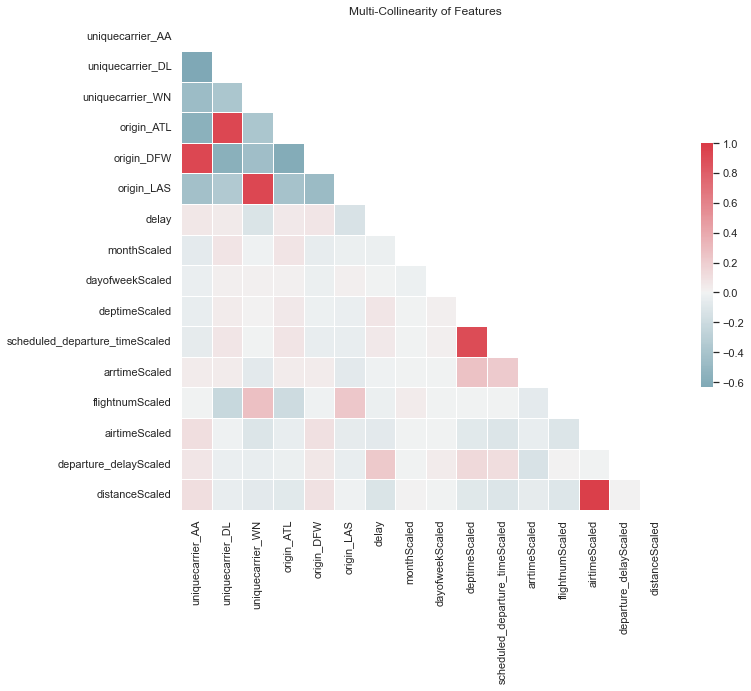

In [67]:
# a) Decide which features to keep (Data)
sns.set(style="white")
corr = airline_final1.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

## **Resample the Data Set: Undersample**

In [68]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

print("Before OverSampling count of Delay: {}".format(sum(Y_train==1)))
print("Before OverSampling count of Not Delay: {} \n".format(sum(Y_train==0)))

Before OverSampling count of Delay: 6133
Before OverSampling count of Not Delay: 785 



In [69]:
# Install smote-variants
!pip install smote-variants

  Using cached smote_variants-0.7.1-py3-none-any.whl (407 kB)
  Using cached statistics-1.0.3.5-py3-none-any.whl
  Using cached tensorflow-2.11.0-cp39-cp39-macosx_10_14_x86_64.whl (244.3 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached mkl-2023.0.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (186.7 MB)
  Using cached MiniSom-2.3.0-py3-none-any.whl
  Using cached metric_learn-0.6.2-py2.py3-none-any.whl (64 kB)
  Using cached intel_openmp-2023.0.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (752 kB)
  Using cached tbb-2021.8.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.0 MB)
  Using cached libclang-14.0.6-py2.py3-none-macosx_10_9_x86_64.whl (13.2 MB)
  Using cached protobuf-3.19.6-cp39-cp39-macosx_10_9_x86_64.whl (980 kB)
  Using cached grpcio-1.51.1-cp39-cp39-macosx_10_10_x86_64.whl (4.6 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  

In [73]:
from sklearn.utils import shuffle

In [77]:
# let us first join the train_x and train_y for ease of operation

trainData = pd.concat([X_train,Y_train],axis=1)
trainData

,uniquecarrier_AA,uniquecarrier_DL,uniquecarrier_WN,origin_ATL,origin_DFW,origin_LAS,monthScaled,dayofweekScaled,deptimeScaled,scheduled_departure_timeScaled,arrtimeScaled,flightnumScaled,airtimeScaled,departure_delayScaled,distanceScaled,delay
1744657,0,0,1,0,0,1,1.000000,-0.50,0.115357,-0.073529,-2.183805,1.640316,1.432990,2.714286,1.888337,1
1399556,1,0,0,1,0,0,0.333333,-0.25,0.301370,0.264706,0.276350,0.693676,-0.020619,0.971429,-0.035980,1
372225,0,1,0,1,0,0,-0.666667,-0.50,0.145638,-0.014706,0.129820,-0.250000,-0.216495,2.171429,-0.192308,1
1036670,1,0,0,0,1,0,0.000000,-0.75,-0.677722,-0.602941,-0.347044,-1.069170,3.690722,-0.428571,3.750620,1
1606243,1,0,0,0,1,0,0.666667,-0.25,-0.876712,-0.926471,-0.742931,-0.509881,0.298969,0.771429,0.281638,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047426,1,0,0,0,1,0,0.000000,0.25,-0.008652,-0.191176,-0.029563,0.173913,-0.804124,2.542857,-0.727047,1
1237084,1,0,0,0,1,0,0.166667,0.00,0.425379,0.397059,0.422879,0.825099,-0.309278,0.857143,-0.260546,1
847994,1,0,0,0,1,0,-0.166667,-0.25,0.149964,0.227941,0.551414,-0.698617,0.896907,-0.171429,0.993797,0
1261597,0,1,0,1,0,0,0.166667,-0.25,-0.109589,-0.058824,-0.086118,-0.286561,0.051546,0.257143,0.140199,1


In [78]:
# Finding the indexes of the sample data set where the propensity is 1
ind = trainData[trainData['delay']==0].index
print(len(ind))

# Seperate the minority classes
minData = trainData.loc[ind]
print(minData.shape)

# Finding indexes of majority class
ind1 = trainData[trainData['delay']==1].index
print(len(ind1))
# Seperating the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

785
(785, 16)
6133
(6133, 16)


,uniquecarrier_AA,uniquecarrier_DL,uniquecarrier_WN,origin_ATL,origin_DFW,origin_LAS,monthScaled,dayofweekScaled,deptimeScaled,scheduled_departure_timeScaled,arrtimeScaled,flightnumScaled,airtimeScaled,departure_delayScaled,distanceScaled,delay
1744657,0,0,1,0,0,1,1.000000,-0.50,0.115357,-0.073529,-2.183805,1.640316,1.432990,2.714286,1.888337,1
1399556,1,0,0,1,0,0,0.333333,-0.25,0.301370,0.264706,0.276350,0.693676,-0.020619,0.971429,-0.035980,1
372225,0,1,0,1,0,0,-0.666667,-0.50,0.145638,-0.014706,0.129820,-0.250000,-0.216495,2.171429,-0.192308,1
1036670,1,0,0,0,1,0,0.000000,-0.75,-0.677722,-0.602941,-0.347044,-1.069170,3.690722,-0.428571,3.750620,1
1606243,1,0,0,0,1,0,0.666667,-0.25,-0.876712,-0.926471,-0.742931,-0.509881,0.298969,0.771429,0.281638,1


In [79]:
# Take a random sample equal to length of the minority class to make the data set balanced

majSample = majData.sample(n=len(ind),random_state = 123)
print(majSample.shape)
majSample.head()

(785, 16)


,uniquecarrier_AA,uniquecarrier_DL,uniquecarrier_WN,origin_ATL,origin_DFW,origin_LAS,monthScaled,dayofweekScaled,deptimeScaled,scheduled_departure_timeScaled,arrtimeScaled,flightnumScaled,airtimeScaled,departure_delayScaled,distanceScaled,delay
701948,1,0,0,0,1,0,-0.333333,0.00,0.735400,0.801471,0.800771,0.375494,1.226804,0.285714,1.115385,1
7080,0,0,1,0,0,1,-0.833333,-0.75,0.112473,0.132353,0.295630,-0.854743,0.422680,-0.200000,0.130273,1
1080241,0,1,0,1,0,0,0.000000,0.00,0.552271,0.569118,0.510283,0.452569,1.360825,0.028571,1.413151,1
539633,1,0,0,0,1,0,-0.500000,-0.75,-0.317231,-0.294118,-0.371465,0.249012,0.298969,-0.428571,0.132754,1
1545204,0,0,1,0,0,1,0.666667,0.25,-0.099495,-0.058824,-0.089974,-0.946640,-0.639175,0.457143,-0.651365,1


In [81]:
# Concatinating both data sets and then shuffling the data set

balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

# Shuffling the data set

from sklearn.utils import shuffle

balData = shuffle(balData)
balData
#.head()

balanced data set shape (1570, 16)


,uniquecarrier_AA,uniquecarrier_DL,uniquecarrier_WN,origin_ATL,origin_DFW,origin_LAS,monthScaled,dayofweekScaled,deptimeScaled,scheduled_departure_timeScaled,arrtimeScaled,flightnumScaled,airtimeScaled,departure_delayScaled,distanceScaled,delay
894997,0,0,1,0,0,1,0.000000,0.00,-0.533526,-0.470588,0.273779,-0.399209,1.082474,-0.142857,1.320099,0
857764,1,0,0,0,1,0,-0.166667,0.75,-0.015862,-0.191176,0.125964,0.483202,-0.247423,2.400000,-0.161290,1
697973,1,0,0,0,0,1,-0.333333,0.25,-0.451334,-0.625000,-0.147634,-0.121542,0.013166,2.200000,0.935484,0
590966,0,0,1,0,0,1,-0.333333,0.50,0.284066,0.235294,-2.161954,-0.426877,0.886598,1.200000,1.254342,1
852903,1,0,0,0,1,0,-0.166667,0.00,0.295602,0.382353,0.555270,-0.034585,0.288660,-0.285714,0.534739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546422,1,0,0,0,1,0,-0.500000,0.50,0.136986,0.227941,0.250643,1.145257,-0.020619,-0.428571,0.050868,0
1710553,1,0,0,0,1,0,0.833333,0.50,-0.569575,-0.610294,-0.508997,-0.877470,0.587629,0.714286,0.508685,1
1578938,0,1,0,1,0,0,0.666667,0.25,0.037491,-0.147059,0.035990,0.483202,-0.711340,2.600000,-0.677419,1
100194,0,1,0,1,0,0,-0.833333,0.00,-1.124730,-1.058824,-0.893316,0.014822,-0.206186,-0.428571,-0.207196,0


In [82]:
# Count of delay and not delay from the balanced data set
balData['delay'].value_counts()

0    785
1    785
Name: delay, dtype: int64

In [93]:
# Making the new X_train and Y_train

X_trainNew = balData.drop(['delay'], axis=1)
X_trainNew.head()

Y_trainNew = balData['delay']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)
Y_trainNew.head()

894997    0
857764    1
697973    0
590966    1
852903    0
Name: delay, dtype: int64

# **Machine Learning Model**

LR: 0.898029 (0.016544)
Score for each of the 10 K-fold tests:  [0.89918577 0.86035313 0.88878676 0.89561261 0.91011771 0.88530919
 0.90767009 0.90278332 0.9254657  0.90500159]
LogisticRegression(solver='liblinear')
	Training time: 0.015s
	Prediction time: 0.142s

LDA: 0.824288 (0.024085)
Score for each of the 10 K-fold tests:  [0.84225806 0.77281504 0.83978758 0.80143541 0.83588487 0.82517968
 0.84839852 0.800038   0.85186279 0.82522194]
LinearDiscriminantAnalysis()
	Training time: 0.010s
	Prediction time: 0.119s

KNN: 0.733374 (0.031942)
Score for each of the 10 K-fold tests:  [0.79238393 0.67470398 0.75390114 0.74538619 0.77179016 0.72569914
 0.72171444 0.71272917 0.72563607 0.70979312]
KNeighborsClassifier()
	Training time: 0.006s
	Prediction time: 0.260s

CART: 0.654210 (0.029906)
Score for each of the 10 K-fold tests:  [0.65430587 0.60399656 0.68660131 0.66823308 0.64445125 0.68524514
 0.6495341  0.68694785 0.66288051 0.5999029 ]
DecisionTreeClassifier()
	Training time: 0.026s
	P

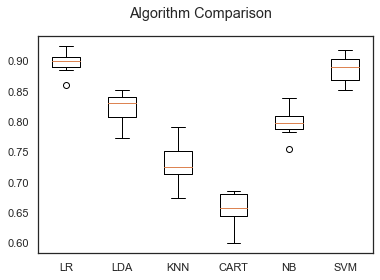

In [89]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, Y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #Y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(Y_train, Y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #Y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(Y_test, Y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# **Go further with the SVM**

In [90]:
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)



from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, Y_train)

evaluate(svm_clf, X_train_std, X_test_std, Y_train, Y_test)

NameError: name 'X_train_std' is not defined

In [97]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(balData.get_feature_names())
type(dt.feature_importances_)
dv.get_feature_names()

AttributeError: 'DataFrame' object has no attribute 'get_feature_names'

# **Create an Application for the Model**

In [96]:
!pip install -q streamlit